In [1]:
import matplotlib.pyplot as plt
from dataset import Dataset
import numpy as np

In [2]:
%matplotlib inline

## Study on immigration on Canada throught the years of 1980-2012

In [3]:
df = Dataset()

## Immigration to Canada

Text(0.5, 1.0, 'Immigration to Canada')

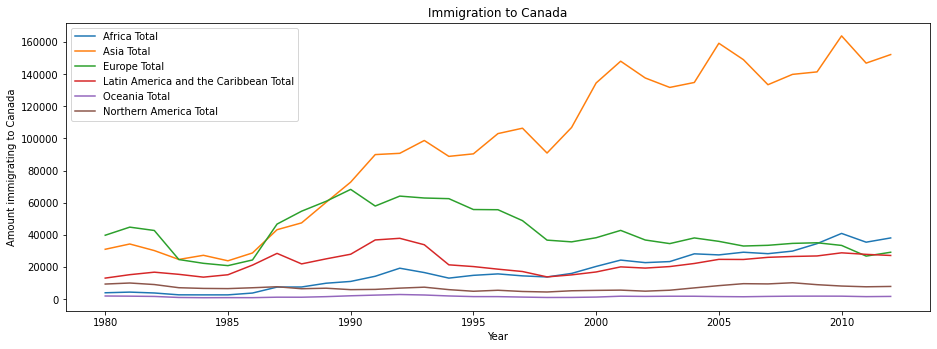

In [4]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
years = df.total_continent_immigr.columns
continent_total_list = df.total_continent_immigr.index
for continent in continent_total_list:
    immigration_data = df.total_continent_immigr.loc[continent]
    ax.plot(years, immigration_data, label=continent)
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Amount immigrating to Canada')
ax.set_title('Immigration to Canada')

## Emmigration to Canada per continent

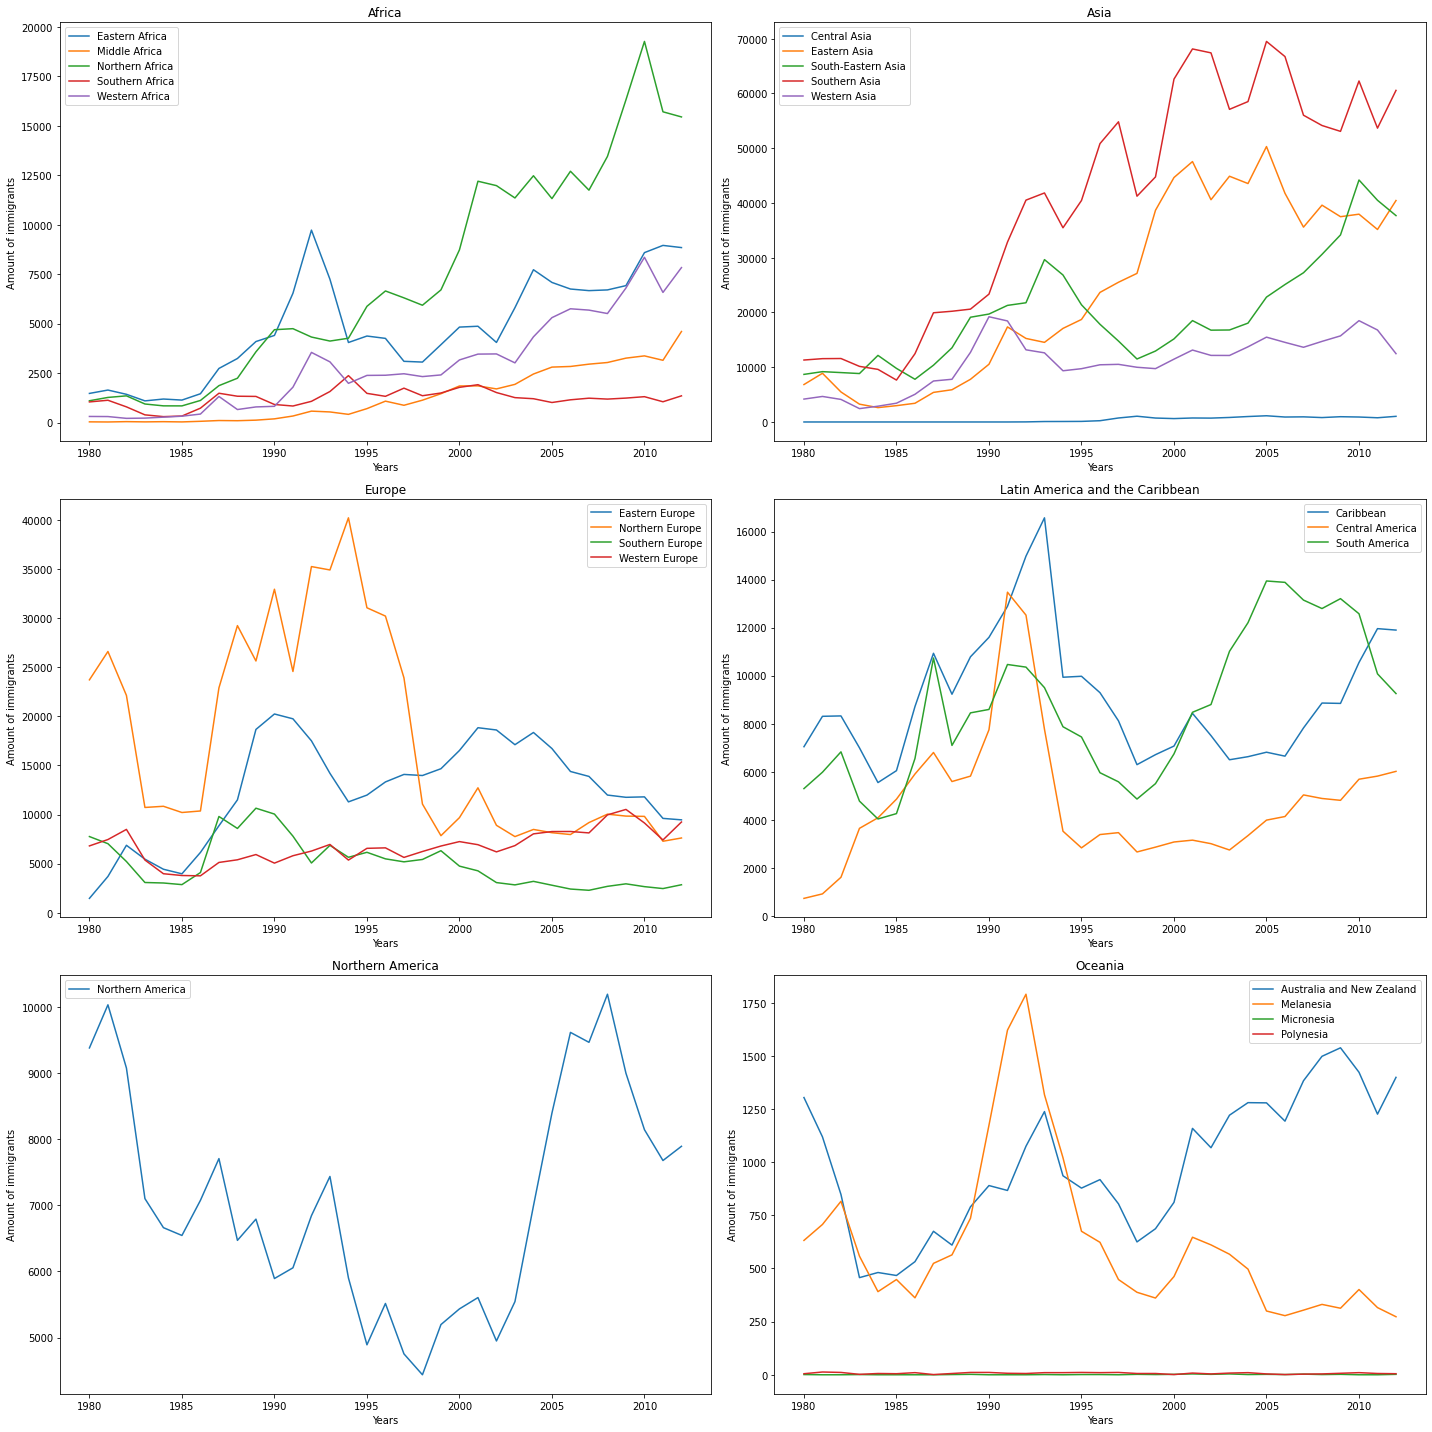

In [5]:
continent_list = df.reg_immigr.index.levels[0]
cols = 2
continent_list = np.array(continent_list).reshape(-1, cols)
rows = len(continent_list)
years = df.reg_immigr.columns

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20,20))
for i in range(3):
    for idx, continent in enumerate(continent_list[i]):
        region_list = df.reg_immigr.loc[continent].index
        for region in region_list:
            region_data = df.reg_immigr.loc[continent].loc[region]
            axes[i][idx].plot(years, region_data, label=region)
        axes[i][idx].set_title(continent)
        axes[i][idx].set_xlabel('Years')
        axes[i][idx].set_ylabel('Amount of immigrants')
        axes[i][idx].legend()
plt.tight_layout()

## Pie chart representing percentage of immigrant's continent of origin

([<matplotlib.patches.Wedge at 0x7f95ed1d0040>,
 [Text(1.0520303275387766, 0.32129766562901535, 'Africa'),
  Text(-0.6544506691084553, 0.8841347870678403, 'Asia'),
  Text(-0.20048673678599788, -1.0815752717092335, 'Europe'),
  Text(0.8620986149140466, -0.6832173725567015, 'Latin America and the Caribbean'),
  Text(1.0616398557933235, -0.2879597482134114, 'Oceania'),
  Text(1.0922469145389204, -0.13037130696671165, 'Northern America')],
 [Text(0.5738347241120599, 0.1752532721612811, '9%'),
  Text(-0.35697309224097556, 0.4822553384006401, '51%'),
  Text(-0.10935640188327156, -0.5899501482050364, '22%'),
  Text(0.4702356081349345, -0.3726640213945644, '12%'),
  Text(0.5790762849781764, -0.15706895357095166, '1%'),
  Text(0.5957710442939564, -0.07111162198184272, '4%')])

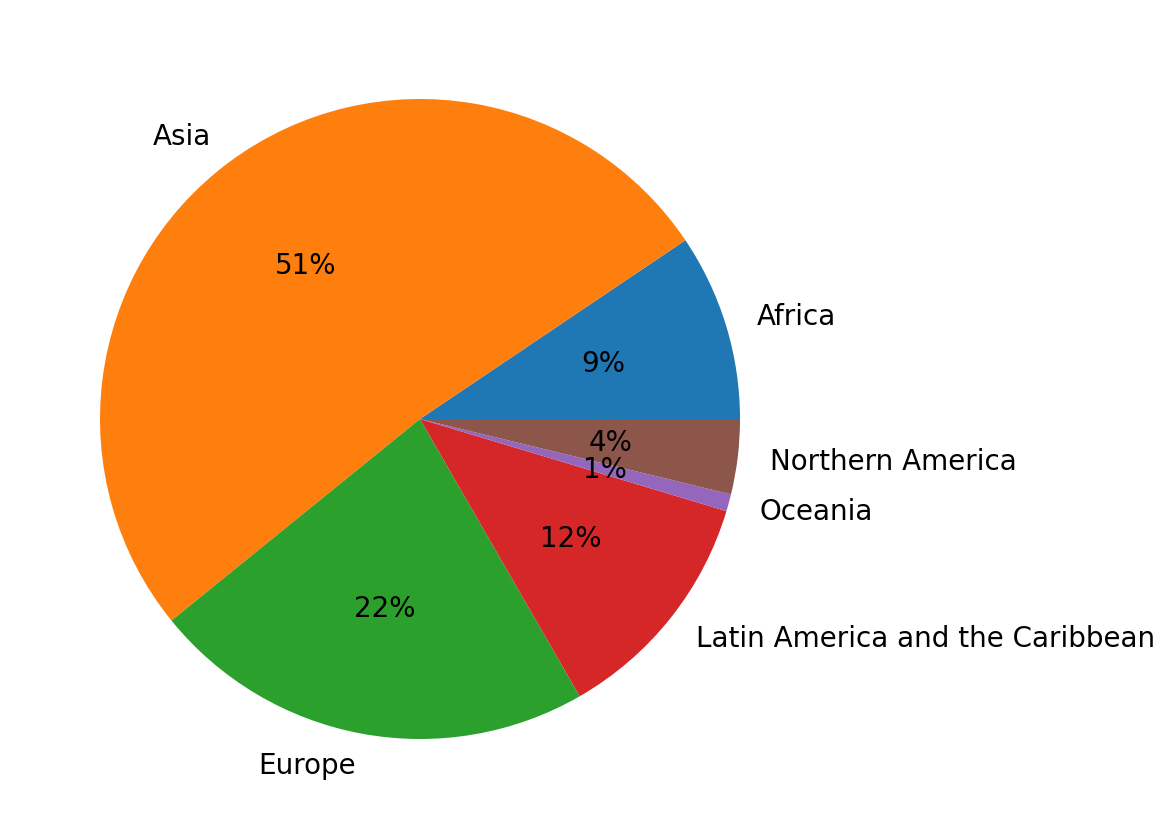

In [6]:
total_per_continent = df.total_continent_immigr.T.sum()
continents = [continent.split('Total')[0][:-1] for continent in total_per_continent.index]
data = [total for total  in total_per_continent]
fig = plt.figure(dpi=200)
ax = fig.add_axes([0,0,1,1])
ax.pie(data, labels=continents,autopct='%.0f%%')
